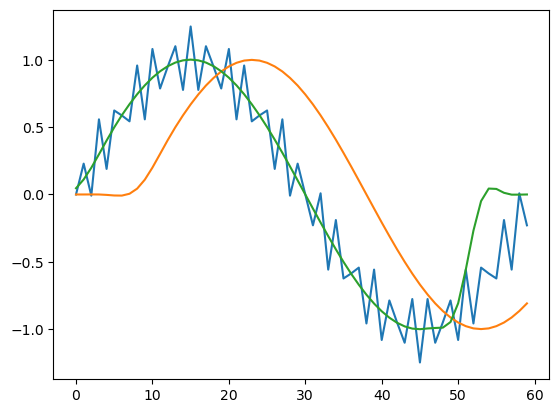

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# 时长为1秒
t = 1
# 采样率为60hz
fs = 60
t_split = np.arange(0, t * fs)

# 1hz与25hz叠加的正弦信号
x_1hz = t_split * 1 * np.pi * 2 / fs
x_25hz = t_split * 25 * np.pi * 2 / fs
signal_sin_1hz = np.sin(x_1hz)
signal_sin_25hz = np.sin(x_25hz)

signal_sin = signal_sin_1hz + 0.25 * signal_sin_25hz

# 构建低通FIR滤波器
def filter_fir(input_signal):
    # 通带边缘频率为10Hz，阻带边缘频率为22Hz
    # 阻带衰减为44dB，窗内项数为17的汉宁窗函数
    num_taps = 17
    cutoff_freq = 10 / (fs / 2)  # 归一化频率
    fir_coeff = firwin(num_taps, cutoff=cutoff_freq, window='hann')  # 使用汉宁窗构建滤波器
    filtered_signal = lfilter(fir_coeff, 1.0, input_signal)  # 对信号进行滤波
    return filtered_signal

# 实现零相移滤波
def filter_zero_phase(input_signal):
    # 首先正向滤波
    forward_filtered = filter_fir(input_signal)
    # 将信号反向，再次滤波
    reverse_signal = forward_filtered[::-1]
    reverse_filtered = filter_fir(reverse_signal)
    # 将信号再反向
    zero_phase_filtered = reverse_filtered[::-1]
    return zero_phase_filtered

if __name__ == "__main__":
    delay_filtered_signal = filter_fir(signal_sin)
    zerophase_filtered_signal = filter_zero_phase(signal_sin)

    plt.plot(t_split, signal_sin, label = 'origin')
    plt.plot(t_split, delay_filtered_signal, label = 'fir')
    plt.plot(t_split, zerophase_filtered_signal, label = 'zero phase')

    plt.show()
